In [5]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go

#read the csv file
d = pd.read_csv('bank-full.csv', delimiter = ';')

#plotting the boxplot to check for the outliers
tra = go.Box(y = d['balance'], name = 'Balance')
layout = go.Layout(title = 'Boxplot of Average yearly Balance')
f = go.Figure(data = [tra], layout = layout)
f.show()

#remove the outliers
m_bal = np.mean(d['balance'])
st_bal = np.std(d['balance'])

thresh = 3 * st_bal
outliers = d[(d['balance'] > m_bal + thresh) | (d['balance'] < m_bal - thresh)]
data = d.drop(outliers.index)

#Boxplot of the number of contacts performed for the client during the campaign based on 
#the outcome of the previous marketing campaign
data.drop(data.loc[data['previous'] == 275].index, inplace = True)
fig5 = px.box(data, x = 'poutcome', y = 'previous', color = 'poutcome')
fig5.show()

#handling the unknown cases and education statuses based on the basic know hows
data.loc[(data['age'] > 60) & (data['job'] == 'unknown'), 'job'] = 'retired'
data.loc[(data['education'] == 'unknown') & (data['job'] == 'management'), 'education'] = 'tertiary'

#adding a new feature called the public holiday feature to observe if that has any significant impact
public_holidays = {
    'jan-01' : "New Year's Eve",
    'feb-21' : "Shorve Tuesday",
    'mar-19' : "Father's Day",
    'mar-20' : "Spring Equinox",
    'mar-25' : "Daylight Saving Start",
    'apr-06' : "Good Friday",
    'apr-08' : "Easter",
    'apr-25' : "Freedom Day",
    'may-01' : "Labor Day",
    'may-06' : "Mother's Day",
    'jun-10' : "Portugal Day",
    'jun-20' : "Summer Solstice",
    'jul-26' : "Grandparent's Day",
    'aug-15' : "Assumption",
    'sep-22' : "Autumnal Equinox",
    'oct-28' : "Daylight Saving End",
    'dec-08' : "Immaculate Conception",
    'dec-21' : "Winter Solstice",
    'dec-24' : "Christmas Eve",
    'dec-25' : "Christmas Day",
    'dec-31' : "New Year's Eve"
}

data['Public Holiday'] = data.apply(lambda row: 'yes' if f"{row['month']}-{row['day']}" in public_holidays else 'no', axis=1)

#plotting a bargraph for the total number of clients with respect to their job title
counts = data['job'].value_counts().reset_index(name = 'count').rename(columns = {'index':'job'})
fig = px.bar(counts, x = 'job', y = 'count', color_discrete_sequence = px.colors.qualitative.Pastel, 
             title = 'Total number of clients with respect to their job titles')
fig.show()



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [2]:
counts = data['Public Holiday'].value_counts().reset_index(name = 'count').rename(columns = {'index':'holidays'})
fig = px.bar(counts, x = 'holidays', y = 'count', color_discrete_sequence = px.colors.qualitative.Pastel, 
             title = 'Public Holiday feature distribution')
fig.show()
print(counts)

grp = data.groupby(['Public Holiday','y'])['y'].count().unstack()

tr1 = go.Bar(x = grp.index.tolist(), y = grp['no'], name = 'Not Subscribed')
tr2 = go.Bar(x = grp.index.tolist(), y = grp['yes'], name = 'Subscribed')

da = [tr1, tr2]
l = go.Layout(barmode = 'stack', title = '',
             xaxis = dict(title = 'Public Holidays', tickmode = 'array', tickvals = grp.index.tolist(), ticktext = grp.index.tolist()))
fig = go.Figure(data = da, layout = l)
fig.show()

  holidays  count
0       no  43769
1      yes    696


In [3]:
#scatter plot
fig1 = px.scatter(data, x = 'age', y = 'balance', color = 'y', title = 'age vs average yearly balance scatterplot')
fig1.show()

In [4]:

sub1 = data.groupby(['education','y'])['y'].count().unstack()

tr1 = go.Bar(x = sub1.index.tolist(), y = sub1['no'], name = 'Not Subscribed')
tr2 = go.Bar(x = sub1.index.tolist(), y = sub1['yes'], name = 'Subscribed')

da = [tr1, tr2]
l = go.Layout(barmode = 'stack', title = 'Status of the Subscription based on Education Level',
             xaxis = dict(title = 'Education Level', tickmode = 'array', tickvals = sub1.index.tolist(), ticktext = sub1.index.tolist()))
fig2 = go.Figure(data = da, layout = l)
fig2.show()

In [5]:
#plotting histogram
tr = go.Histogram(x = data['age'])
layout = go.Layout(title = 'Histogram Plot of age distribution of the clients', xaxis = dict(title = 'Age distribution'), yaxis = dict(title = 'Total number of clients'))
fig4 = go.Figure(data = [tr], layout = layout)
fig4.show()



In [6]:
df = data.query('default == "yes"')
fig5 = px.box(df, x = 'job', y = 'balance', color = 'job', title = 'Average yearly balance vs the job title of clients')
fig5.show()

In [7]:
#summary statistics separately for numerical and categorical data

num = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
num_sum = d[num].describe().T


cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
cat_sum = pd.DataFrame(columns=['Count', 'Unique', 'Top', 'Frequency'])
for feature in cat_col:
    unique_vals = d[feature].unique()
    count = len(d[feature])
    unique = len(unique_vals)
    top = d[feature].mode()[0]
    freq = d[feature].value_counts()[top]
    cat_sum.loc[feature] = [count, unique, top, freq]


# Create table for numeric summary statistics
num_tab = num_sum[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
num_tab = num_tab.rename(columns={'count': 'Count', 'mean': 'Mean', 'std': 'Standard Deviation',
                                              'min': 'Minimum', '25%': '25th Percentile', '50%': 'Median',
                                              '75%': '75th Percentile', 'max': 'Maximum'})
num_tab.index.name = 'Numeric Variable'
print(num_tab)


                    Count         Mean  Standard Deviation  Minimum  \
Numeric Variable                                                      
age               45211.0    40.936210           10.618762     18.0   
balance           45211.0  1362.272058         3044.765829  -8019.0   
duration          45211.0   258.163080          257.527812      0.0   
campaign          45211.0     2.763841            3.098021      1.0   
pdays             45211.0    40.197828          100.128746     -1.0   
previous          45211.0     0.580323            2.303441      0.0   

                  25th Percentile  Median  75th Percentile   Maximum  
Numeric Variable                                                      
age                          33.0    39.0             48.0      95.0  
balance                      72.0   448.0           1428.0  102127.0  
duration                    103.0   180.0            319.0    4918.0  
campaign                      1.0     2.0              3.0      63.0  
pdays

In [8]:
print(cat_sum)


           Count  Unique          Top  Frequency
job        45211      12  blue-collar       9732
marital    45211       3      married      27214
education  45211       4    secondary      23202
default    45211       2           no      44396
housing    45211       2          yes      25130
loan       45211       2           no      37967
contact    45211       3     cellular      29285
month      45211      12          may      13766
poutcome   45211       4      unknown      36959
y          45211       2           no      39922


In [9]:
#Standardizing or Normalizing the data based on numerical Columns
from sklearn.preprocessing import MinMaxScaler
idx = [0,5,9,11,12,13,14]
scaler = MinMaxScaler()
data[data.columns[idx]] = scaler.fit_transform(data[data.columns[idx]])

In [10]:
#Train and test data splitting
#performing feature engineering on the data
#one-hot-encoding on the categorical data as there is no ordinal relationship 
#for some categorical attributes
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as pl
from sklearn.metrics import confusion_matrix
import seaborn as sn


#split the data into input and target features
X = data.drop(['y'], axis = 1)
y = data['y']

#encoding the target variable y 
l = LabelEncoder()
data['y'] = l.fit_transform(data['y'])
y = data['y']

# Define the categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 
            'housing', 'loan', 'contact', 'month', 'poutcome', 'Public Holiday']

# Perform one-hot encoding on the categorical columns
preprocessor = ColumnTransformer(
   transformers=[('cat', OneHotEncoder(), cat_cols)],
    remainder='passthrough')

X = preprocessor.fit_transform(X)

#Split the data into test and train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


#Plot the test and train data for target feature
train_df = pd.DataFrame({'y': y_train})
ytr = train_df['y'].value_counts().reset_index(name = 'Count').rename(columns = {'index':'y'})
fi = px.bar(ytr, x = 'y', y = 'Count', color_discrete_sequence = px.colors.qualitative.Pastel,
            title = 'Target Train Features')
fi.show()

test_df = pd.DataFrame({'y': y_test})
ytst = test_df['y'].value_counts().reset_index(name = 'Count').rename(columns = {'index':'y'})
fi = px.bar(ytst, x = 'y', y = 'Count', color_discrete_sequence = px.colors.qualitative.Pastel,
           title = 'Target test Features')
fi.show()
#count the number of yes and nos in the train and test set
print("Train set counts: \n", y_train.value_counts())
print("Test set counts: \n", y_test.value_counts())



Train set counts: 
 0    31413
1     4159
Name: y, dtype: int64
Test set counts: 
 0    7884
1    1009
Name: y, dtype: int64


Best hyperparameters:  {'classifier__max_depth': 15, 'classifier__n_estimators': 100, 'selector__threshold': 0.01}
The training accuracy of the model is:  0.915270437422692
Accuracy of the model is:  0.9026200382323175
The classification report of the decision tree: 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      7884
           1       0.60      0.44      0.50      1009

    accuracy                           0.90      8893
   macro avg       0.76      0.70      0.73      8893
weighted avg       0.89      0.90      0.90      8893



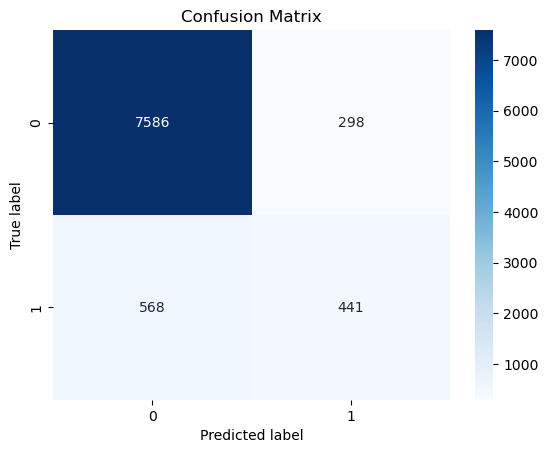

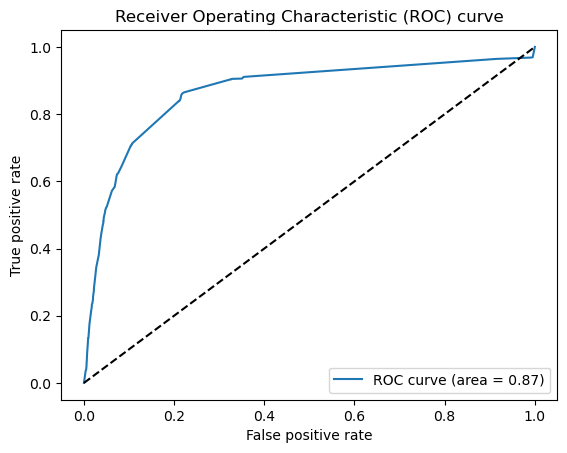

/Users/shashankrallapalli/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



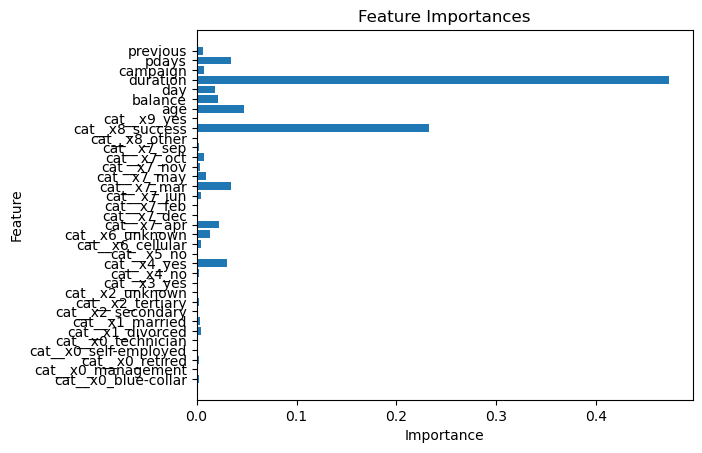

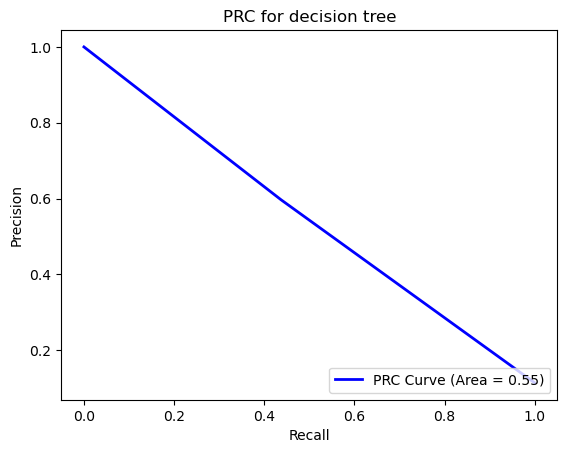

In [31]:
#Decision Tree with pruning and feature engineering methods 
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from IPython.display import Image
import pydotplus

# Set up the hyperparameter grid for the DecisionTreeClassifier

X_train1 = X_train
y_train1 = y_train
X_test1 = X_test
y_test1 = y_test

param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV on the Decision tree based on the hyper parameters set
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the model on the training set using GridSearchCV
grid_search.fit(X_train1, y_train1)

# Evaluate the model on test set and getting the training accuracy for the train set
y_pred = grid_search.predict(X_test1)
sc = grid_search.score(X_test1, y_test1)
t_sc = grid_search.score(X_train1, y_train1)
print("Best hyperparameters: ", grid.best_params_)
print("The training accuracy of the model is: ", t_sc)
print("Accuracy of the model is: ", sc)

# Printing the most important features
#importances = grid_search.best_estimator_.feature_importances_

#feature_names = preprocessor.get_feature_names()
#for i in range(len(importances)):
 #   if importances[i] > 0:
  #      print("Feature {}: {} ({})".format(i, feature_names[i], importances[i]))


# Plot the ROC curve
# Predict probabilities for the test set
y_probs = grid_search.predict_proba(X_test1)[:, 1]
y_pred = grid_search.predict(X_test1)

#classification report
print("The classification report of the decision tree: \n", classification_report(y_test1, y_pred))

# Compute the confusion matrix
cm = confusion_matrix(y_test1, y_pred)

# Plot the confusion matrix as a heatmap
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')
pl.title('Confusion Matrix')
pl.xlabel('Predicted label')
pl.ylabel('True label')
pl.show()

# Metrics for ROC
fprd, tprd, thresholds = roc_curve(y_test1, y_probs)
roc_dec1 = roc_auc_score(y_test1, y_probs)

# ROC curve

pl.plot(fprd, tprd, label='ROC curve (area = %0.2f)' % roc_dec1)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title("Receiver Operating Characteristic (ROC) curve")
pl.legend(loc='lower right')
pl.show()

# Extract the feature importances from the GridSearchCV object
imp = grid_search.best_estimator_.feature_importances_

# Extract the feature names from the ColumnTransformer object
fea_nam = preprocessor.get_feature_names()

# Get the indices of the non-zero feature importances
indices = [i for i, val in enumerate(imp) if val > 0]

# Plot the feature importances in a horizontal bar graph
pl.barh(range(len(indices)), imp[indices], align='center')
pl.yticks(range(len(indices)), [fea_nam[i] for i in indices])
pl.xlabel('Importance')
pl.ylabel('Feature')
pl.title('Feature Importances')
pl.show()

#plotting the precision recall curve(PRC)
from sklearn.metrics import precision_recall_curve, auc
y_pr = grid_search.predict(X_test1)
pre_dec, rec_dec, _ = precision_recall_curve(y_test1, y_pr)
pr_Dec = auc(rec_dec, pre_dec)
pl.plot(rec_dec, pre_dec, color = "Blue", lw = 2, label = "PRC Curve (Area = %0.2f)" %pr_Dec)
pl.xlabel("Recall")
pl.ylabel("Precision")
pl.title('PRC for decision tree')
pl.legend(loc = "lower right")
pl.show()


Best hyperparameters:  {'classifier__max_depth': 15, 'classifier__n_estimators': 100, 'selector__threshold': 0.01}
Best accuracy score:  0.9038570565774414
Test accuracy score:  0.907230405937254
The classification report of the decision tree: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7884
           1       0.65      0.39      0.49      1009

    accuracy                           0.91      8893
   macro avg       0.79      0.68      0.72      8893
weighted avg       0.89      0.91      0.90      8893



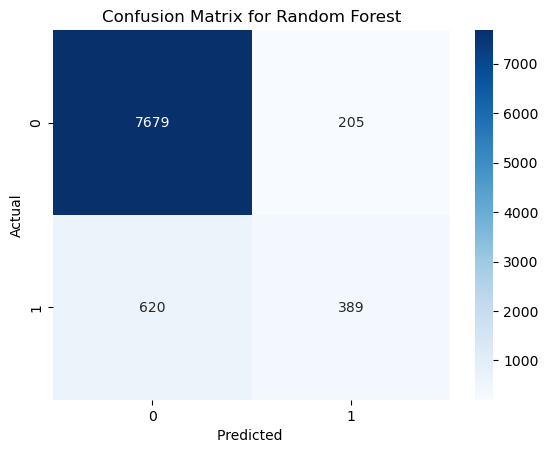

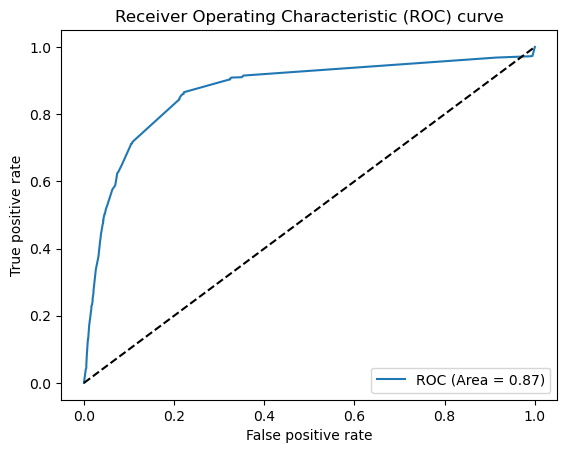

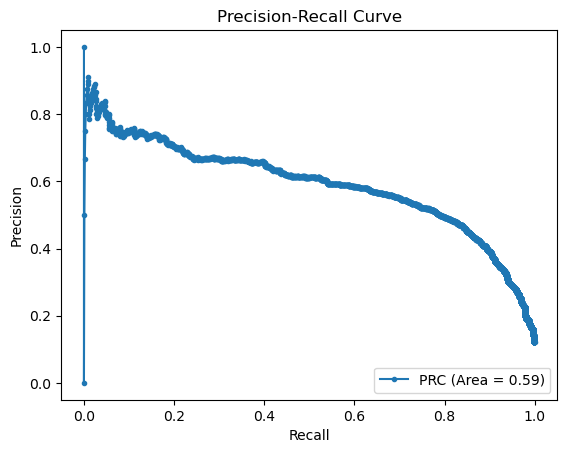

In [28]:
#Random Forest pruning
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


X_train2 = X_train
y_train2 = y_train
X_test2 = X_test
y_test2 = y_test

# Create a pipeline with feature selection and the classifier
pipe = Pipeline([('selector', SelectFromModel(RandomForestClassifier())), ('classifier', RandomForestClassifier(random_state=42))])

# Define the parameter grid for the hyperparameters to be tuned
param_grid = {'selector__threshold': [0.01, 0.05, 0.1], 'classifier__n_estimators': [100, 250, 500], 'classifier__max_depth': [5, 10, 15]}

# Perform grid search cross-validation
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train2, y_train2)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters: ", grid.best_params_)
print("Best accuracy score: ", grid.best_score_)

# Get the accuracy score on the test set
test_score = grid.score(X_test2, y_test2)
print("Test accuracy score: ", test_score)

y_pred = grid.predict(X_test2)

#classification report
print("The classification report of the decision tree: \n", classification_report(y_test2, y_pred))

#plotting the confusion Matrix
cm = confusion_matrix(y_test2, y_pred)
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')
pl.xlabel('Predicted ')
pl.ylabel('Actual')
pl.title('Confusion Matrix for Random Forest')
pl.show()

#plotting the ROC curve
y_prob = grid_search.predict_proba(X_test2)[:,1]
fprf, tprf, threshold = roc_curve(y_test2, y_prob)
rocf = roc_auc_score(y_test2, y_prob)

pl.plot(fprf, tprf, label = "ROC (Area = %0.2f)"%rocf)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title("Receiver Operating Characteristic (ROC) curve")
pl.legend(loc='lower right')
pl.show()

# Compute the precision-recall curve
pre_Rf, rec_Rf, _ = precision_recall_curve(y_test, grid.predict_proba(X_test2)[:, 1])
pr_Rf = auc(rec_Rf, pre_Rf)
#Plot the PR curve
pl.plot(rec_Rf, pre_Rf, label = "PRC (Area = %0.2f)"%pr_Rf, marker='.')
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.title('Precision-Recall Curve')
pl.legend(loc = 'lower right')
pl.show()

Train accuracy of the model is:  0.9325593163162037
The accuracy of the model is:  0.9111660856853705


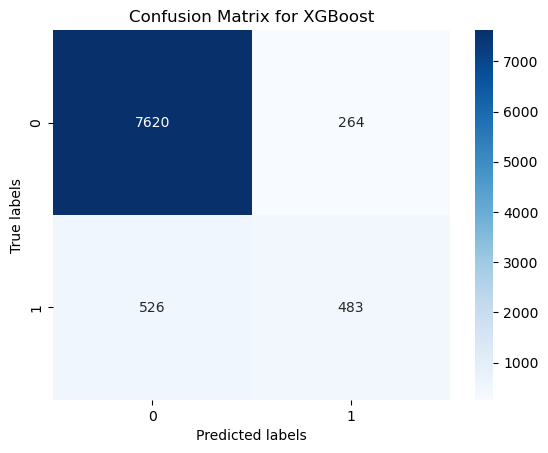

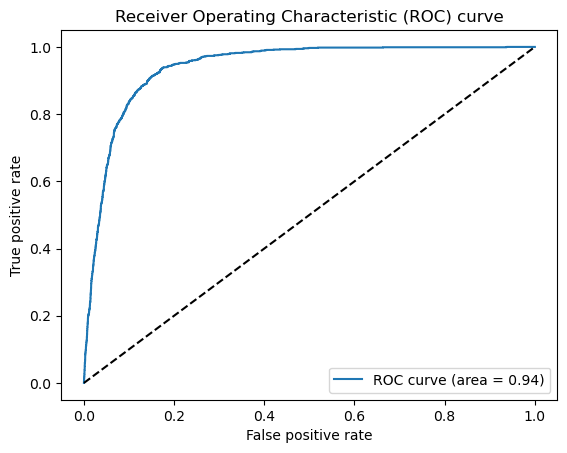

Optimal threshold based on Youden's J statistic:  0.09297781


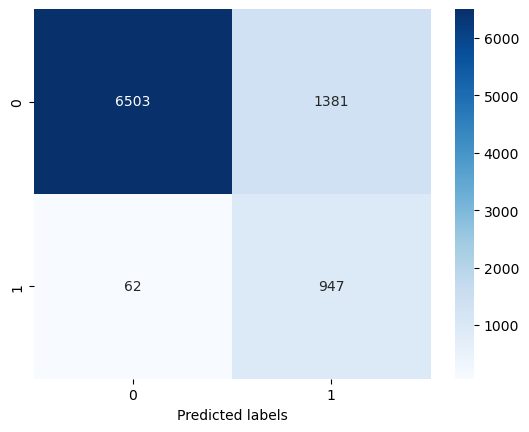

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.82      0.90      7884
           1       0.41      0.94      0.57      1009

    accuracy                           0.84      8893
   macro avg       0.70      0.88      0.73      8893
weighted avg       0.92      0.84      0.86      8893



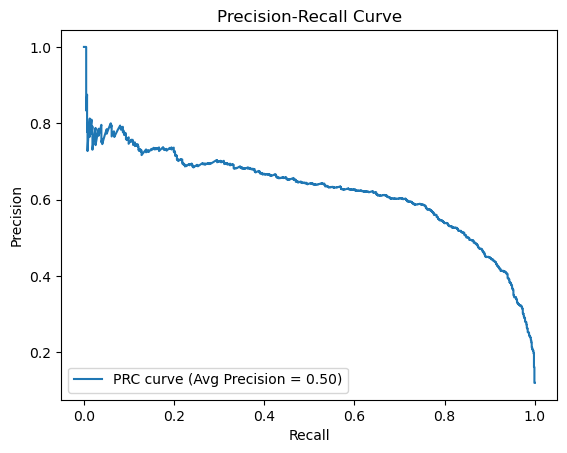

In [30]:
#XGBoost model

import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score
import xgboost as xgb

X_train3 = X_train
y_train3 = y_train
X_test3 = X_test
y_test3 = y_test

# Create XGBoost classifier and fit to training data
clf = xgb.XGBClassifier()
# Define hyperparameter grid
param_grid = {
    "max_depth": [3, 4, 5],
    "learning_rate": [0.1, 0.01],
    "n_estimators": [100, 200, 300]
}
# Perform grid search cross-validation for hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train3, y_train3)
clf = grid_search.best_estimator_

# Evaluate the model on test set
t_sc = clf.score(X_train3, y_train3)
sc = clf.score(X_test3, y_test3)
print("Train accuracy of the model is: ", t_sc)
print("The accuracy of the model is: ", sc)

# Plot ROC curve
# Predict probabilities for the test set
y_pr = clf.predict_proba(X_test3)[:, 1]

#plotting the confusion matrix
y_pred = clf.predict(X_test3)
cm = confusion_matrix(y_test3, y_pred)
sn.heatmap(cm, annot=True, cmap='Blues', fmt = 'g')
pl.xlabel('Predicted labels')
pl.ylabel('True labels')
pl.title('Confusion Matrix for XGBoost')
pl.show()


fprx, tprx, thresholds = roc_curve(y_test3, y_pr)
roc_xg = roc_auc_score(y_test3, y_pr)

#ROC curve
pl.plot(fprx, tprx, label = 'ROC curve (area = %0.2f)' %roc_xg)
pl.plot([0,1],[0,1], 'k--')
pl.xlabel('False positive rate')
pl.ylabel('True positive rate')
pl.title("Receiver Operating Characteristic (ROC) curve")
pl.legend(loc = 'lower right')
pl.show()

#Calculating the best threshold
j_scores = tprx - fprx
best_threshold = thresholds[np.argmax(j_scores)]
print("Optimal threshold based on Youden's J statistic: ", best_threshold)

# Make predictions using the optimal threshold
y_pred = (y_pr >= best_threshold).astype(int)
cm = confusion_matrix(y_test3, y_pred)
sn.heatmap(cm, annot=True, cmap='Blues', fmt = 'g')
pl.xlabel('Predicted labels')
pl.show()

# Generate classification report
report = classification_report(y_test3, y_pred)
print("Classification Report: \n", report)

# Calculate precision-recall curve and average precision score
pre_Xg, rec_Xg, _ = precision_recall_curve(y_test3, y_pr)
prc_XG = auc(rec_Xg, rec_Xg)

# Plot precision-recall curve
pl.plot(rec_Xg, pre_Xg, label='PRC curve (Avg Precision = %0.2f)' % prc_XG)
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.title('Precision-Recall Curve')
pl.legend(loc='lower left')
pl.show()

0:	learn: 0.5734338	total: 66.7ms	remaining: 1m 6s
100:	learn: 0.1874408	total: 536ms	remaining: 4.77s
200:	learn: 0.1708868	total: 997ms	remaining: 3.96s
300:	learn: 0.1594467	total: 1.46s	remaining: 3.4s
400:	learn: 0.1496721	total: 1.96s	remaining: 2.94s
500:	learn: 0.1411031	total: 2.45s	remaining: 2.44s
600:	learn: 0.1339464	total: 3.01s	remaining: 2s
700:	learn: 0.1277731	total: 3.44s	remaining: 1.47s
800:	learn: 0.1221960	total: 3.85s	remaining: 957ms
900:	learn: 0.1173061	total: 4.26s	remaining: 468ms
999:	learn: 0.1128035	total: 4.73s	remaining: 0us
0:	learn: 0.5670622	total: 5.65ms	remaining: 5.64s
100:	learn: 0.1874694	total: 463ms	remaining: 4.12s
200:	learn: 0.1719456	total: 885ms	remaining: 3.52s
300:	learn: 0.1605845	total: 1.28s	remaining: 2.98s
400:	learn: 0.1512338	total: 1.7s	remaining: 2.54s
500:	learn: 0.1434851	total: 2.11s	remaining: 2.1s
600:	learn: 0.1373743	total: 2.51s	remaining: 1.67s
700:	learn: 0.1321534	total: 2.9s	remaining: 1.24s
800:	learn: 0.1261004	t

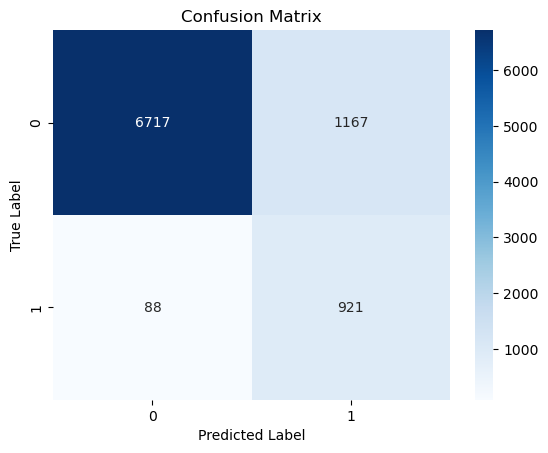

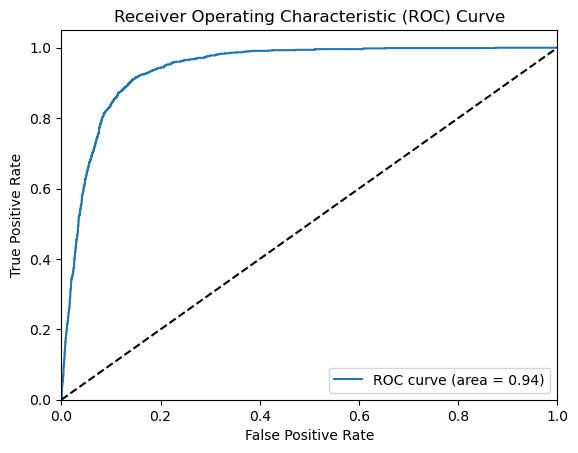

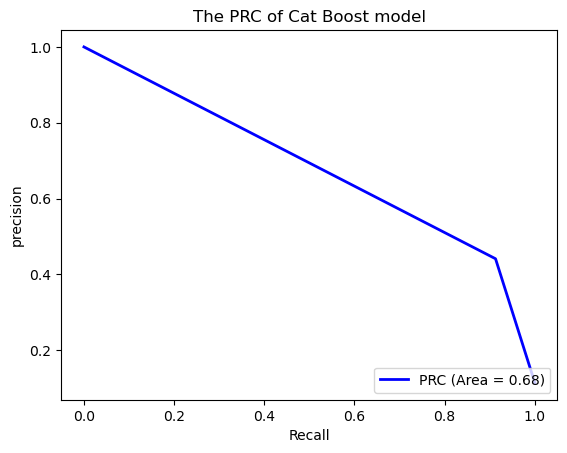

In [18]:
#Categorical Gradient Boost Method
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
X_train4 = X_train
y_train4 = y_train
X_test4 = X_test
y_test4 = y_test
cbg = CatBoostClassifier(iterations = 1000, 
                         learning_rate = 0.1, 
                         depth = 6, random_seed = 42, 
                         verbose =100, l2_leaf_reg = 5)
cbg.fit(X_train4, y_train4)

# Get feature importance
feat_imp = pd.Series(cbg.get_feature_importance(), index=preprocessor.get_feature_names_out()).sort_values(ascending=False)

# Select top 30 features
top_feat = feat_imp[:30].index.tolist()

# Get the new X_train and X_test with selected features
X_train_fs = pd.DataFrame(X_train4, columns=preprocessor.get_feature_names_out())[top_feat]
X_test_fs = pd.DataFrame(X_test4, columns=preprocessor.get_feature_names_out())[top_feat]

# Fit the model with selected features
cbg_fs = CatBoostClassifier(iterations = 1000, 
                            learning_rate = 0.1, 
                            depth = 6, 
                            random_seed = 42, 
                            verbose = 100, 
                            l2_leaf_reg = 5)

cbg_fs.fit(X_train_fs, y_train4)
# Get the predicted probabilities for the test set
y_pred_proba = cbg_fs.predict_proba(X_test_fs)[:,1]

# Calculate sensitivity and specificity for each threshold value
sensitivity = []
specificity = []
thresholds = np.arange(0, 1.01, 0.01)
for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test4, y_pred).ravel()
    sensitivity.append(tp / (tp + fn))
    specificity.append(tn / (tn + fp))

# Find the threshold that maximizes the Youden's J statistic
J = np.array(sensitivity) + np.array(specificity) - 1
best_threshold = thresholds[np.argmax(J)]

# Print the best threshold
print("Best threshold using Youden's J statistic: ", best_threshold)

# Calculate test accuracy
y_pred = (y_pred_proba >= best_threshold).astype(int)
accuracy = accuracy_score(y_test4, y_pred)
print("Test accuracy: ", accuracy)

# Print classification report
print("Classification Report:\n", classification_report(y_test4, y_pred))

# Calculate the confusion matrix
cm = confusion_matrix(y_test4, y_pred)

# Plot the confusion matrix as a heatmap
sn.heatmap(cm, annot=True, cmap='Blues', fmt='g')

pl.title('Confusion Matrix')
pl.xlabel('Predicted Label')
pl.ylabel('True Label')
pl.show()


# Calculate ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test4, y_pred_proba)
auc_score = roc_auc_score(y_test4, y_pred_proba)

# Plot ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#Calculating the AUC precision recall Curve and plotting it out
pre_ct, rec_ct, _ = precision_recall_curve(y_test4, y_pred)
auc_ct = auc(rec_ct, pre_ct)
pl.plot(rec_ct, pre_ct, color = "Blue", lw = 2, label = "PRC (Area = %0.2f)"%auc_ct)
pl.xlabel("Recall")
pl.ylabel("precision")
pl.title("The PRC of Cat Boost model")
pl.legend(loc = 'lower right')
pl.show()

<function matplotlib.pyplot.show(close=None, block=None)>

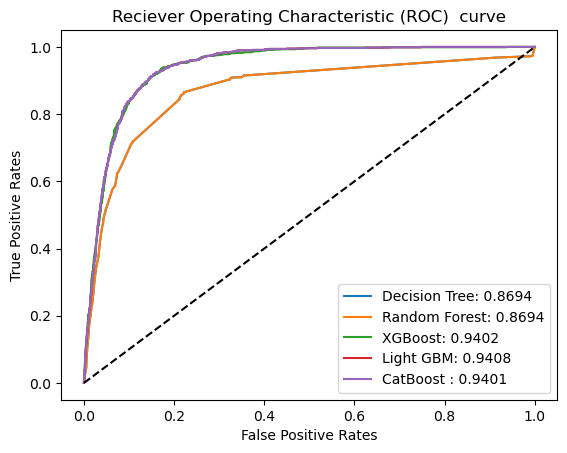

In [29]:
#comparing all the ROC curves of the selected models
pl.plot(fprd, tprd, label = "Decision Tree: %0.4f" %roc_dec1)
pl.plot(fprf, tprf, label = "Random Forest: %0.4f" %rocf)
pl.plot(fprx, tprx, label = "XGBoost: %0.4f" %roc_xg)
pl.plot(fprl, tprl, label = "Light GBM: %0.4f" %roc_auc_sel)
pl.plot(fpr, tpr, label = "CatBoost : %0.4f" %auc_score)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlabel('False Positive Rates')
pl.ylabel('True Positive Rates')
pl.title('Reciever Operating Characteristic (ROC)  curve')
pl.legend(loc = 'lower right')
pl.show

Test accuracy on selected features with hyperparameter tuning:  0.913415045541437
The best threshold calculated using Youden'J Statistics is:  0.10040906243632329


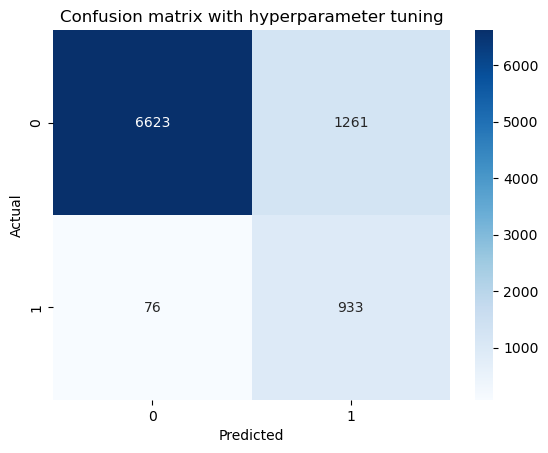

Classification report with hyperparameter tuning:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      7884
           1       0.43      0.92      0.58      1009

    accuracy                           0.85      8893
   macro avg       0.71      0.88      0.75      8893
weighted avg       0.92      0.85      0.87      8893



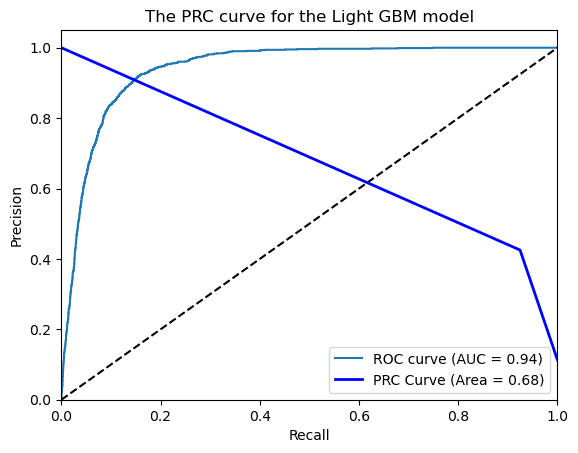

In [21]:
#lightgbm with gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
import lightgbm as lgbm

X_train5 = X_train
y_train5 = y_train
X_test5 = X_test
y_test5 = y_test

# Perform feature selection
k = 40
selector = SelectKBest(f_classif, k=k)
X_train_sel = selector.fit_transform(X_train5, y_train5)
X_test_sel = selector.transform(X_test5)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'num_leaves': [31, 63, 127],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200]
}

# Define the search object
lgbm_model = lgbm.LGBMClassifier(random_state=42)
lgbm_search = GridSearchCV(lgbm_model, param_grid, cv=5, scoring='roc_auc')

# Fit the search object on the training data with the selected features
lgbm_search.fit(X_train_sel, y_train5)

# Evaluate the best model on the test data with the selected features
best_model = lgbm_search.best_estimator_
y_pred_sel = best_model.predict(X_test_sel)
accuracy_sel = sum([1 if y >= 0.5 else 0 for y in y_pred_sel] == y_test5) / len(y_test5)
print("Test accuracy on selected features with hyperparameter tuning: ", accuracy_sel)

# Get the predicted probabilities for the test data
y_prob_sel = best_model.predict_proba(X_test_sel)[:, 1]

# Calculate Youden's J statistic for different threshold values
fpr, tpr, thresholds = roc_curve(y_test5, y_prob_sel)
j_scores = tpr - fpr
best_threshold_idx = np.argmax(j_scores)
best_threshold = thresholds[best_threshold_idx]
print("The best threshold calculated using Youden'J Statistics is: ", best_threshold)

# Convert the predicted probabilities to binary predictions
y_pred_sel = (y_prob_sel >= best_threshold).astype(int)

# Plot the confusion matrix
cm_sel = confusion_matrix(y_test5, y_pred_sel)
sn.heatmap(cm_sel, annot=True, cmap='Blues', fmt='g')
pl.title('Confusion matrix with hyperparameter tuning')
pl.xlabel('Predicted')
pl.ylabel('Actual')
pl.show()

# Print the classification report
cr_sel = classification_report(y_test5, y_pred_sel)
print('Classification report with hyperparameter tuning:\n{}'.format(cr_sel))

# Plot the ROC curve
fprl, tprl, _ = roc_curve(y_test5, y_prob_sel)
roc_auc_sel = roc_auc_score(y_test5, y_prob_sel)
pl.plot(fprl, tprl, label='ROC curve (AUC = {:.2f})'.format(roc_auc_sel))
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.05])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('ROC curve with hyperparameter tuning')
pl.legend(loc='lower right')

#plot the PRC curve
pre_lg, rec_lg, _ = precision_recall_curve(y_test5, y_pred_sel)
pr_lg = auc(rec_lg, pre_lg)
pl.plot(rec_lg, pre_lg, color = "Blue", lw =2, label = "PRC Curve (Area = %0.2f)"%pr_lg)
pl.xlabel('Recall')
pl.ylabel('Precision')
pl.title("The PRC curve for the Light GBM model")
pl.legend(loc = 'lower right')
pl.show()


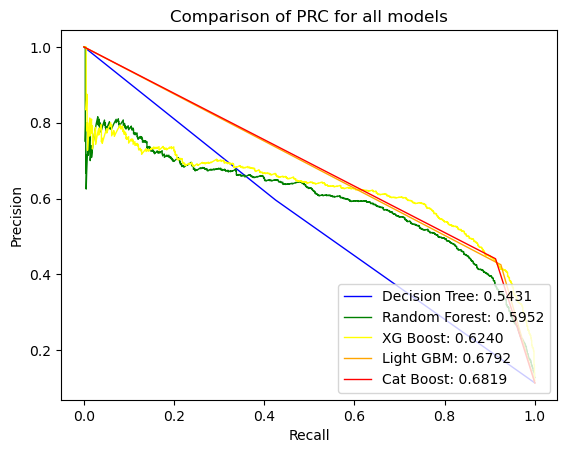

In [22]:
#plotting the PRc curve for all the models
pl.plot(rec_dec, pre_dec, color = "Blue", lw = 1, label = "Decision Tree: %0.4f"%pr_Dec)
pl.plot(rec_Rf, pre_Rf, color = "Green", lw = 1, label = "Random Forest: %0.4f"%pr_Rf)
pl.plot(rec_Xg, pre_Xg, color = "Yellow", lw = 1, label = "XG Boost: %0.4f"%prc_XG)
pl.plot(rec_lg, pre_lg, color = "Orange", lw = 1, label = "Light GBM: %0.4f"%pr_lg)
pl.plot(rec_ct, pre_ct, color = "Red", lw = 1, label = "Cat Boost: %0.4f"%auc_ct)
pl.xlabel("Recall")
pl.ylabel("Precision")
pl.title("Comparison of PRC for all models")
pl.legend(loc = 'lower right')
pl.show()